In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.fromfile("../data/example00.fil", offset=307, dtype=np.uint8)
data = data.reshape(-1, 4096)
data = np.fliplr(data)
data = data.T
data

array([[64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64],
       ...,
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64],
       [64, 64, 64, ..., 64, 64, 64]], shape=(4096, 261), dtype=uint8)

In [3]:
nf, nt = data.shape
nf, nt

(4096, 261)

In [4]:
dt = 1.31072e-3
df = 0.048828125
fh = 750.0244140625

bw = df * nf
tobs = nt * dt
fl = fh - bw + (0.5 * df)

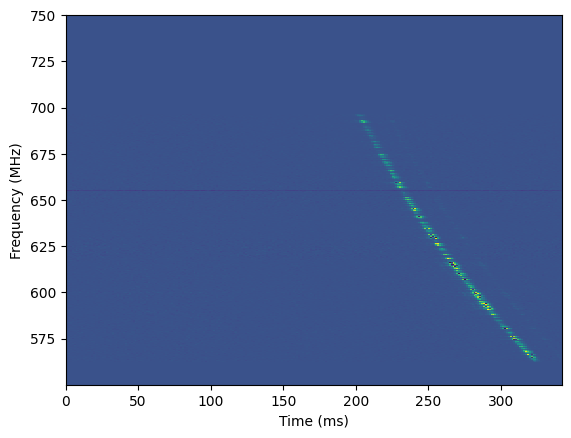

In [5]:
fig, ax = plt.subplots()
ax.imshow(
    data,
    aspect="auto",
    cmap="viridis",
    origin="lower",
    interpolation="none",
    extent=(0.0, tobs * 1e3, fl, fh),
)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Frequency (MHz)")
plt.show()

In [6]:
dm = 26.7
kdm = 4.1488064239e3
freqs = np.linspace(fl, fh, nf)
delays = np.asarray([kdm * dm * (f**-2 - fh**-2) for f in freqs])

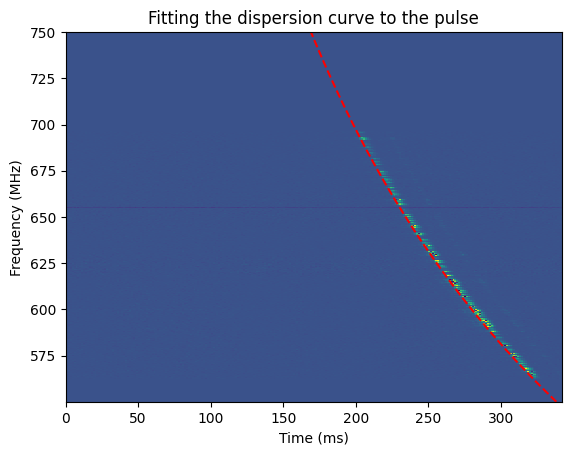

In [7]:
fig, ax = plt.subplots()
ax.imshow(
    data,
    aspect="auto",
    cmap="viridis",
    origin="lower",
    interpolation="none",
    extent=(0.0, tobs * 1e3, fl, fh),
)
ax.plot((delays[0] + delays) * 1e3, freqs, color="red", ls="--")
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Frequency (MHz)")
ax.set_title("Fitting the dispersion curve to the pulse")
plt.show()